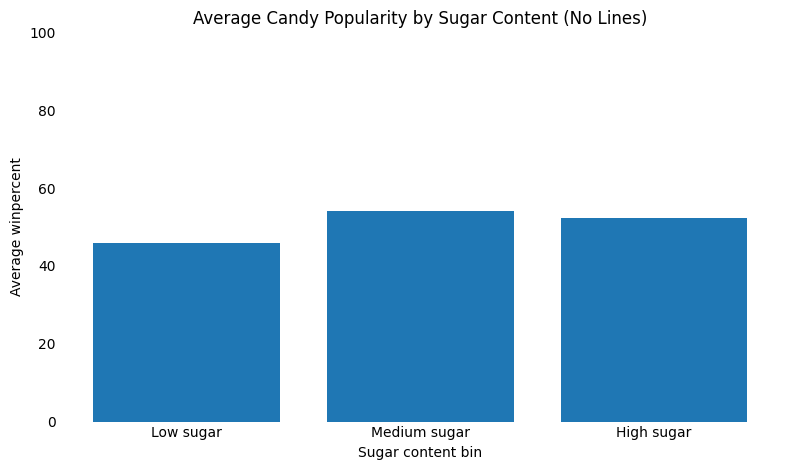

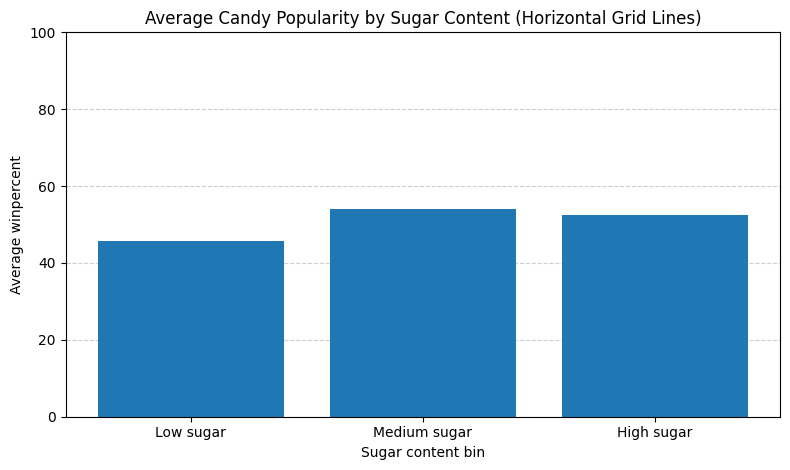

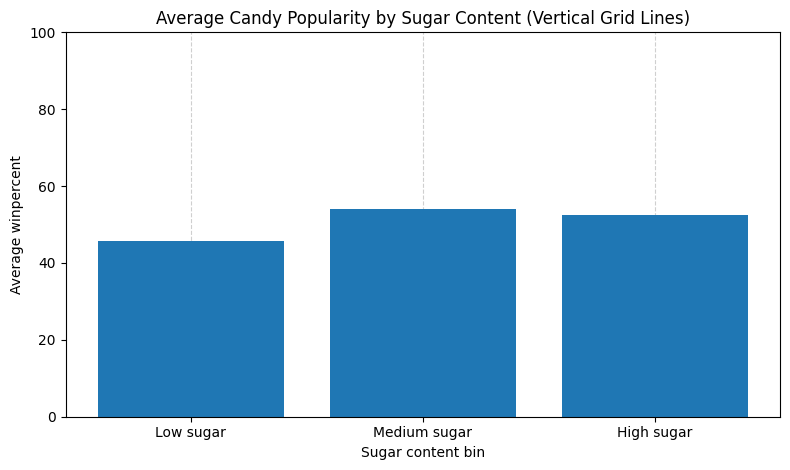

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/content/candy-data (1).csv")   # <- change this to your file path if needed

# Bin sugarpercent into Low/Medium/High
bins = [0.0, 0.33, 0.66, 1.0]
sugar_labels = ["Low sugar", "Medium sugar", "High sugar"]

df["sugar_bin"] = pd.cut(
    df["sugarpercent"],
    bins=bins,
    labels=sugar_labels,
    include_lowest=True,
)

# Average popularity (winpercent) by sugar bin
mean_pop = (
    df.groupby("sugar_bin", observed=True)["winpercent"]
      .mean()
      .reindex(sugar_labels)
)

# 1) NO LINES
fig1, ax1 = plt.subplots(figsize=(8, 4.8))
ax1.bar(mean_pop.index.astype(str), mean_pop.values)
ax1.set_title("Average Candy Popularity by Sugar Content (No Lines)")
ax1.set_xlabel("Sugar content bin")
ax1.set_ylabel("Average winpercent")
ax1.set_ylim(0, 100)

ax1.grid(False)
for spine in ax1.spines.values():
    spine.set_visible(False)
ax1.tick_params(axis="both", length=0)


fig1.tight_layout()
fig1.savefig("candy_popularity_by_sugar_no_lines.png", dpi=200, bbox_inches="tight")

# 2) HORIZONTAL LINES ONLY (y-grid)
fig2, ax2 = plt.subplots(figsize=(8, 4.8))
ax2.bar(mean_pop.index.astype(str), mean_pop.values)
ax2.set_title("Average Candy Popularity by Sugar Content (Horizontal Grid Lines)")
ax2.set_xlabel("Sugar content bin")
ax2.set_ylabel("Average winpercent")
ax2.set_ylim(0, 100)

ax2.set_axisbelow(True)
ax2.grid(True, axis="y", linestyle="--", alpha=0.6)

fig2.tight_layout()
fig2.savefig("candy_popularity_by_sugar_horizontal_lines.png", dpi=200, bbox_inches="tight")

# 3) VERTICAL LINES ONLY (x-grid)
fig3, ax3 = plt.subplots(figsize=(8, 4.8))
ax3.bar(mean_pop.index.astype(str), mean_pop.values)
ax3.set_title("Average Candy Popularity by Sugar Content (Vertical Grid Lines)")
ax3.set_xlabel("Sugar content bin")
ax3.set_ylabel("Average winpercent")
ax3.set_ylim(0, 100)

ax3.set_axisbelow(True)
ax3.grid(True, axis="x", linestyle="--", alpha=0.6)

fig3.tight_layout()
fig3.savefig("candy_popularity_by_sugar_vertical_lines.png", dpi=200, bbox_inches="tight")

plt.show()